# [ 기후과 폭력범죄의 상관관계 분석 ]

In [702]:
# 문제정의 
# (1) 기후와 폭력범죄는 관계가 있을까?
# (2) 최종 가설 설정 : 불쾌지수가 높을수록 폭력범죄가 더 많이 일어났을 것이다.

# 데이터 수집 : 2006 ~ 2018 대구시 기온, 범죄발생 및 검거, 강수량 데이터 
#              불쾌지수 데이터 (존재하지 않아서 직접 생성)

[1] 모듈 로딩 및 데이터 확인 <hr>

In [703]:
# [1-1] 모듈 로딩 
import pandas as pd                         # 데이터 분석 및 전처리 모듈
import matplotlib.pyplot as plt             # 데이터 시각화 모듈
import matplotlib.font_manager as fm        # 폰트 설정
import numpy as np                          # 배열 관련 모듈 

In [704]:
# [1-2] 데이터 로딩 및 폰트 설정 

# 데이터 읽어오기
data1=r'../Mini project/bad.xlsx'

# 멀티인덱스로 설정 
crime=pd.read_excel(data1).T

# sorts=['year','sort','occurence/arrest']
# crime=crime.set_index(['year','sort','occurence/arrest'])

# 폰트 설정
plt.rc('font', family='Malgun Gothic')

[2] 데이터 전처리

In [705]:
# [2-1] 데이터 확인 : 대구 연도별, 월별 범죄발생 및 검거 데이터 (2000 ~ 2018)
display(crime)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
연도,범죄 종류,발생/검거,합계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2000,계,발생 (건),96512,7693,6259,7615,7136,7823,8706,9240,8822,8239,8283,8400,8296
2000.1,계,검거 (건),86875,6882,5359,6939,6583,7487,8549,8041,7662,7082,7243,7578,7470
2000.2,강력범,발생 (건),607,39,38,65,43,50,55,42,66,41,49,58,61
2000.3,강력범,검거 (건),560,37,34,63,47,49,47,33,64,38,48,57,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.11,풍속범,검거 (건),239,24,9,26,14,21,19,23,23,19,30,16,15
2018.12,기타형사법,발생 (건),4316,353,304,350,361,364,323,403,375,347,388,385,363
2018.13,기타형사법,검거 (건),3872,343,270,323,313,319,303,360,341,290,347,348,315
2018.14,특별법범,발생 (건),30039,2646,2065,2783,2647,2690,2561,2648,2539,2041,2607,2542,2270


In [706]:
# 필요한 데이터만 남기고 나머지 삭제
# - 현재 필요한 데이터 : 2000 ~ 2018년까지의 월별 폭력범 발생(건)

# 0번 열의 정보가 폭력범인 데이터만 따로 추출
crime_group1=crime.groupby(0)
crime_group2=crime_group1.get_group('폭력범')

# 위의 데이터에서 1번 열의 정보가 발생 (건)인 데이터만 따로 추출
crime_group3=crime_group2.groupby(1)
crime_group4=crime_group3.get_group('발생 (건)')

# 인덱스 뒤에 붙어있는 .6 제거 
crime_group4=crime_group4.reset_index()
crime_group4['index']=crime_group4['index'].str.replace('.6','')
crime_group4.set_index('index',inplace=True)

# 0번 열과 1번 열 삭제
crime_group4.drop(columns=[0,1],inplace=True)

# 컬럼명 재설정
crime_group4.columns=['total','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']

# 데이터 기본정보 확인
crime_group4.info() # 타입이 object
crime_group4=crime_group4.astype('int') # int타입으로 변환

# 데이터의 통계치 확인
crime_group4.describe()

# 최종적으로 2000 ~ 2018년까지의 월별 폭력범 발생(건) 정보 데이터가 생성 
crime_group4

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 2000 to 2018
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   total   19 non-null     object
 1   1월      19 non-null     object
 2   2월      19 non-null     object
 3   3월      19 non-null     object
 4   4월      19 non-null     object
 5   5월      19 non-null     object
 6   6월      19 non-null     object
 7   7월      19 non-null     object
 8   8월      19 non-null     object
 9   9월      19 non-null     object
 10  10월     19 non-null     object
 11  11월     19 non-null     object
 12  12월     19 non-null     object
dtypes: object(13)
memory usage: 2.1+ KB


,total,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
index,,,,,,,,,,,,,
2000,19274,1508,1309,1342,1278,1658,1964,1791,1833,1625,1772,1668,1526
2001,19440,1525,1477,1609,1575,1589,1771,1727,1755,1703,1680,1590,1439
2002,17040,1532,1052,1346,1444,1576,1314,1523,1531,1378,1507,1413,1424
2003,17383,1398,1275,1325,1300,1388,1584,1546,1529,1644,1626,1412,1356
2004,15736,1388,1178,1314,1216,1346,1529,1307,1204,1177,1387,1245,1445
2005,15859,1172,988,1230,1169,1335,1396,1440,1513,1517,1350,1521,1228
2006,15611,1396,1250,1197,1205,1365,1351,1321,1443,1280,1339,1296,1168
2007,16294,1248,1130,1256,1284,1422,1380,1474,1512,1170,1728,1452,1238
2008,17215,1253,994,1209,1345,1484,1494,1621,1385,1590,1655,1626,1559


In [707]:
# 비교할 데이터 불러오기
data902=r'../Mini project/weather.xlsx'
weatherDF=pd.read_excel(data902)

# 데이터 확인 : 대구 기상개황 
weatherDF=weatherDF.T
weatherDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
연도,sort,합계,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2000,평균기온 (℃),14.2,1.1,1.3,7.9,13,19.5,23.3,26.9,26.5,21.2,16.7,9.4,3.9
2000,평균최고기온 (℃),19,5.1,6,13.6,18.5,25.1,28.1,31.5,30.4,25.1,21.5,14.4,9.2
2000.1,최고극값기온 (℃),35,11.5,10.6,19.4,25.3,33.6,35,34.8,33.3,32.3,26.6,21.2,15.3
2000.2,평균최저기온 (℃),10,-2.7,-2.9,2.8,7.9,14.2,19.2,23.4,23.6,18,12.4,5.2,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022.10,일조시간 (시간),...,231.4,240.4,206.4,253.3,313.3,205.9,180.5,...,...,233.8,209.3,209.5
2022.11,최심신적설 (㎝),0.8,-,-,-,-,-,-,-,-,-,-,-,0.8
2022.12,평균풍속 (m/s),2.3,2.3,3.1,2.4,2.2,2.5,2.4,2.3,1.7,2.3,2.1,1.7,2.4
2022.13,최대풍속 (m/s),9.6,9.3,9.5,9.6,8.5,9.1,7.9,6.2,7.4,9.4,8.7,8.1,9


In [708]:
# 필요한 데이터만 남기고 나머지 삭제
# - 현재 필요한 데이터 : 2000 ~ 2022년까지의 대구 평균기온 데이터

# 0번 열의 정보가 평균기온 (℃)인 데이터만 따로 추출
weather_group1=weatherDF.groupby(0)
weather_group2=weather_group1.get_group('평균기온 (℃)')

# 0번,1번 행 삭제
weather_group2.drop(columns=[0,1],inplace=True)
print(weather_group2)

# 컬럼명 재설정
weather_group2.columns=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']

# 데이터 기본정보 확인
weather_group2.info() # 타입이 object
weather_group2=weather_group2.astype('int') # int타입으로 변환

# 데이터의 통계치 확인
weather_group2.describe()

# 최종적으로 2000 ~ 2022년까지의 월별 대구 평균기온 데이터가 생성 
# weather_group2

       2    3     4     5     6     7     8     9     10    11    12   13
2000  1.1  1.3   7.9    13  19.5  23.3  26.9  26.5  21.2  16.7   9.4  3.9
2001  0.7  4.2   9.1  15.8  20.5  23.9  27.7  27.2    22  16.6   8.3  1.9
2002  2.3    4  10.1  15.6  18.5  23.3  26.1  24.9    21  14.3   6.2  3.4
2003 -0.4    4   7.8  14.1  18.5  22.2  22.5    25  22.1    15  10.9  3.3
2004  0.8  4.8   8.4  15.4  19.4  23.1  27.3  25.8  21.6  15.7    11  4.8
2005  0.7  1.4   7.2    16  19.5  24.9  26.4  26.3  22.6  15.8    10 -0.3
2006  2.6  3.1   8.2  13.4  18.9  23.4  24.2  28.2  20.6  18.6  10.2  3.6
2007  3.3  6.2   8.8  14.2  19.9    23  24.8  27.6  22.4  16.7     9  4.3
2008  1.5  1.5   9.1  14.8  19.7  21.1  28.4  25.8    23  17.8   9.5  3.3
2009  0.7  6.4     9  15.4  20.9    24  24.8  25.5  22.6  17.2   9.1  2.5
2010    0  3.9   6.9  11.5  19.4  24.8  26.7  28.7  23.3  16.4   8.6    2
2011 -2.5  4.2     7  13.7  18.8  24.3  26.8  26.2    23  15.7  11.9  2.3
2012  0.8  1.1   7.7  15.1  20.1  23.2

C:\Users\knudc\AppData\Local\Temp\ipykernel_13440\3228866006.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_group2.drop(columns=[0,1],inplace=True)


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.608696,3.043478,8.173913,13.913043,19.217391,23.043478,25.869565,26.217391,21.565217,15.652174,9.000000,2.173913
std,1.117592,1.521909,1.072473,1.239980,0.795243,0.824525,1.632186,1.412815,0.895752,0.982052,1.314257,1.435022
min,-2.000000,1.000000,6.000000,11.000000,18.000000,21.000000,22.000000,23.000000,20.000000,14.000000,6.000000,0.000000
25%,0.000000,1.500000,7.000000,13.000000,19.000000,23.000000,25.000000,25.000000,21.000000,15.000000,8.000000,1.000000
50%,0.000000,3.000000,8.000000,14.000000,19.000000,23.000000,26.000000,26.000000,21.000000,16.000000,9.000000,3.000000
75%,1.000000,4.000000,9.000000,15.000000,20.000000,24.000000,27.000000,27.000000,22.000000,16.000000,10.000000,3.000000
max,3.000000,6.000000,10.000000,16.000000,20.000000,24.000000,28.000000,29.000000,23.000000,18.000000,11.000000,4.000000


In [709]:
# 필요한 데이터만 남기고 나머지 삭제
# - 현재 필요한 데이터 : 2000 ~ 2022년까지의 월별 대구 강수량 데이터

# 0번 열의 정보가 강수량 (mm)인 데이터만 따로 추출
weather_group3=weatherDF.groupby(0)
weather_group4=weather_group3.get_group('강수량 (mm)')

# 0번, 1번 행 삭제
weather_group4.drop(columns=[0,1],inplace=True)

# 인덱스명 변경
weather_group4.index=[list(range(2000,2023))]

# 컬럼명 변경
weather_group4.columns=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']

# 데이터 기본정보 확인
weather_group4.info() # 타입이 object

# 데이터 이상치 확인
print(weather_group4['1월'].unique())
print(weather_group4['11월'].unique())
# 1월과 11월 열에서 -라는 이상치 확인 

# 이상치 변경
weather_group4['1월']=weather_group4['1월'].replace('-',0)
weather_group4['11월']=weather_group4['11월'].replace('-',0)

# 데이터 형변환
weather_group4=weather_group4.astype('int') # int타입으로 변환
weather_group4.dtypes

# 데이터의 통계치 확인
weather_group4.describe()

# 최종적으로 2000 ~ 2022년까지의 월별 대구 강수량 데이터가 생성 
# weather_group4

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, (np.int64(2000),) to (np.int64(2022),)
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1월      23 non-null     object
 1   2월      23 non-null     object
 2   3월      23 non-null     object
 3   4월      23 non-null     object
 4   5월      23 non-null     object
 5   6월      23 non-null     object
 6   7월      23 non-null     object
 7   8월      23 non-null     object
 8   9월      23 non-null     object
 9   10월     23 non-null     object
 10  11월     23 non-null     object
 11  12월     23 non-null     object
dtypes: object(12)
memory usage: 2.9+ KB
[9.2 31.1 51.8 24.9 1.2 6.5 14.8 '-' 38.2 7.1 15.2 1 8.1 17.7 2 21.5 23.8
 2.5 21.1 9.5 70.4 11.9 0]
[47.5 8 2.8 41.5 47.3 14.5 35.2 '-' 11.7 32.4 1.7 69.8 32.5 39.8 42.6 70.9
 11.3 0.1 17.2 15.3 23.9 43.1 46.6]


C:\Users\knudc\AppData\Local\Temp\ipykernel_13440\3126060239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_group4.drop(columns=[0,1],inplace=True)
C:\Users\knudc\AppData\Local\Temp\ipykernel_13440\3126060239.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_group4['1월']=weather_group4['1월'].replace('-',0)
C:\Users\knudc\AppData\Local\Temp\ipykernel_13440\3126060239.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
count,23.000000,23.00000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,16.565217,24.26087,45.956522,66.652174,73.347826,115.130435,226.086957,249.173913,140.173913,53.652174,28.043478,17.434783
std,17.495002,18.76219,29.734397,36.931889,50.231834,75.329159,136.557651,138.082865,95.517562,46.944463,21.046438,14.057758
min,0.000000,0.00000,5.000000,19.000000,4.000000,23.000000,77.000000,49.000000,21.000000,5.000000,0.000000,0.000000
25%,4.000000,9.00000,21.500000,40.500000,35.500000,62.500000,130.500000,157.000000,72.500000,20.500000,11.000000,5.500000
50%,11.000000,25.00000,41.000000,63.000000,65.000000,85.000000,169.000000,235.000000,109.000000,38.000000,32.000000,11.000000
75%,22.000000,31.00000,65.500000,82.000000,95.500000,164.000000,283.000000,324.500000,173.000000,72.000000,42.500000,27.500000
max,70.000000,64.00000,106.000000,151.000000,233.000000,296.000000,568.000000,680.000000,364.000000,165.000000,70.000000,50.000000


In [710]:
# 데이터 확인 : 06 ~ 24년 대구 평균기온 데이터 
tem=r'../Mini project/Daegutemper(06_24).xlsx'
temp=pd.read_excel(tem)

# 데이터 기본 정보 확인
temp.info()

# 평균기온(℃) 열 데이터만 추출
tempsr=temp['평균기온(℃)']

# 시리즈 인덱스명 변경
tempsr.index=pd.Index(range(2006,2006+len(tempsr)),name='year')

# 2006~ 2018년 데이터만 남기기
tempsr.drop(index=[2019,2020,2021,2022,2023,2024],inplace=True)
print(tempsr.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년          19 non-null     int64  
 1   지점         19 non-null     int64  
 2   평균기온(℃)    19 non-null     float64
 3   평균최저기온(℃)  19 non-null     float64
 4   평균최고기온(℃)  19 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 888.0 bytes
RangeIndex(start=2006, stop=2019, step=1, name='year')


In [711]:
# 데이터 확인 : 2006 ~ 2018 대구시 불쾌지수 데이터 
bb=r'../Mini project/bull.xlsx'
angry=pd.read_excel(bb)
display(angry)

# 첫번째 행을 인덱스로
angry.set_index('Unnamed: 0',inplace=True)

# 데이터 정보 확인
angry.info() # 모두 실수 타입

,Unnamed: 0,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1월,42.66026,43.89782,40.46675,40.87992,39.43600,37.56500,40.59924,38.73152,43.95680,41.30989,37.72916,40.32128,38.12741
1,2월,43.42012,47.15938,42.64530,47.50200,43.82194,44.32674,41.37816,43.36382,44.62870,43.79286,42.97088,43.77128,42.14780
2,3월,50.34556,50.52224,50.97259,51.21840,47.70636,49.39050,49.19850,52.35282,51.76153,51.36368,50.35460,49.45950,50.63680
3,4월,56.61632,57.69552,58.47456,59.18078,54.18665,57.05798,58.83603,55.26519,59.35660,58.22302,58.64411,59.66336,58.73600
4,5월,64.21149,65.17351,65.01459,66.29668,64.56512,63.98584,65.54847,65.81541,66.41472,67.39667,65.74500,66.41984,64.77096
5,6월,70.66226,70.26610,67.93741,71.13220,71.92408,71.93477,70.63952,72.42262,70.83958,70.37386,71.19422,70.43320,70.85440
6,7월,73.62840,73.87196,78.83704,73.76944,76.42010,76.69272,77.62250,79.00271,76.62240,74.07400,76.32428,79.04500,78.12988
7,8월,78.40224,78.03328,74.95498,74.17870,79.42610,76.25050,78.35691,79.73290,74.32787,75.94000,77.12160,76.56100,77.66064
8,9월,67.06898,70.42976,70.52020,69.77336,71.04689,70.26610,68.83327,70.60490,69.94800,67.67838,69.86999,68.46480,67.91790
9,10월,63.91668,61.30078,62.64476,61.70512,60.76496,59.73794,59.86294,61.97792,60.82304,60.01056,61.34650,60.65598,57.79291


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1월 to 12월
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2006    12 non-null     float64
 1   2007    12 non-null     float64
 2   2008    12 non-null     float64
 3   2009    12 non-null     float64
 4   2010    12 non-null     float64
 5   2011    12 non-null     float64
 6   2012    12 non-null     float64
 7   2013    12 non-null     float64
 8   2014    12 non-null     float64
 9   2015    12 non-null     float64
 10  2016    12 non-null     float64
 11  2017    12 non-null     float64
 12  2018    12 non-null     float64
dtypes: float64(13)
memory usage: 1.3+ KB


[3] 데이터 분석 <hr>

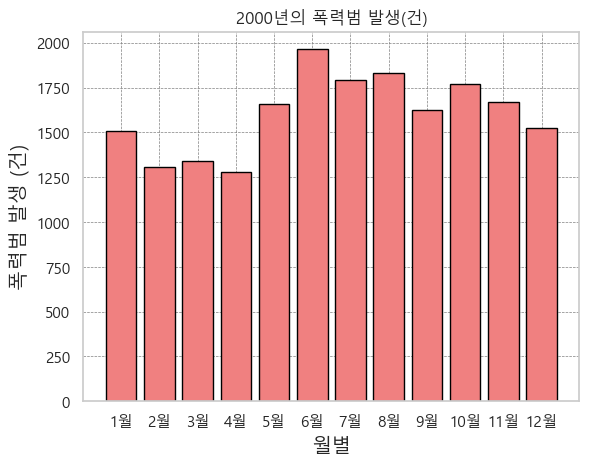

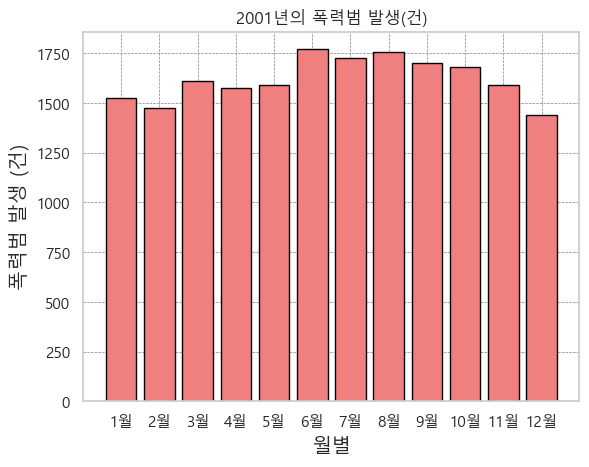

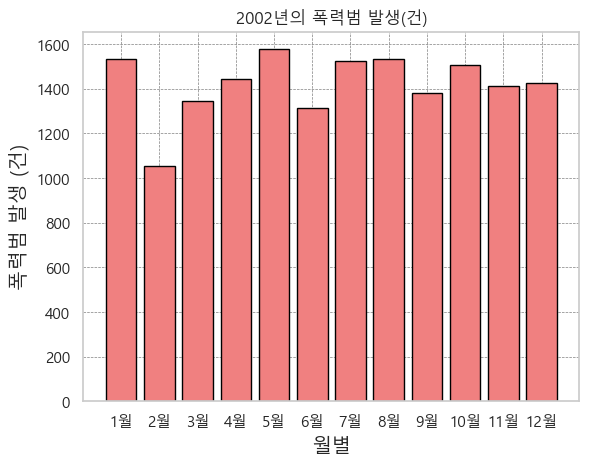

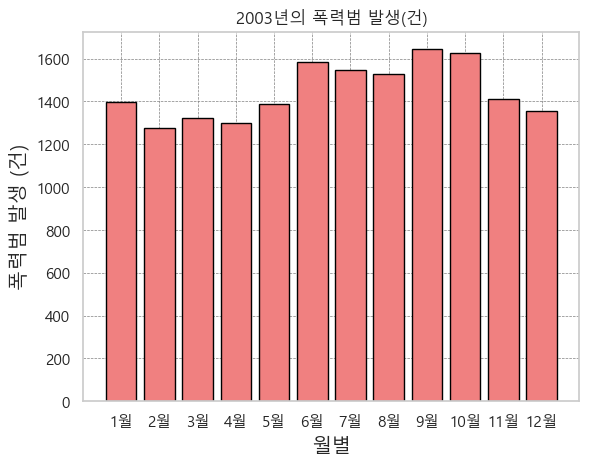

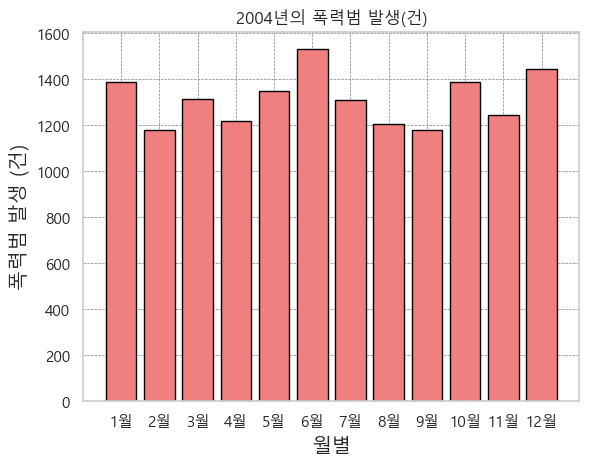

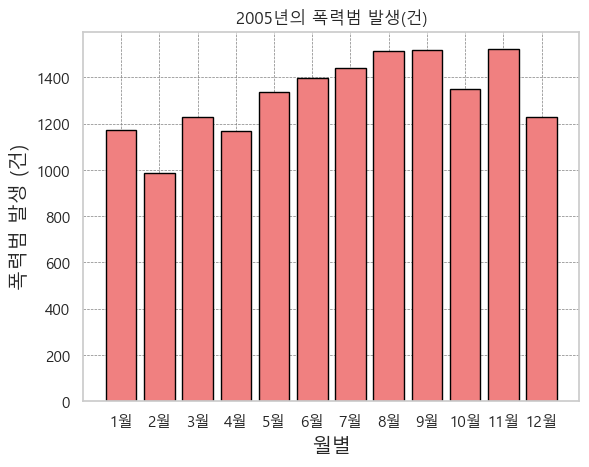

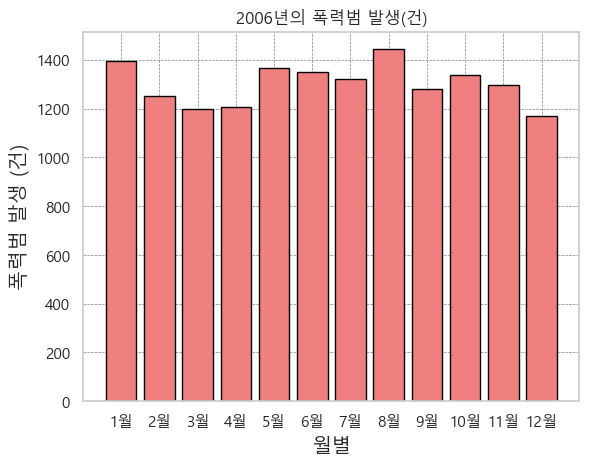

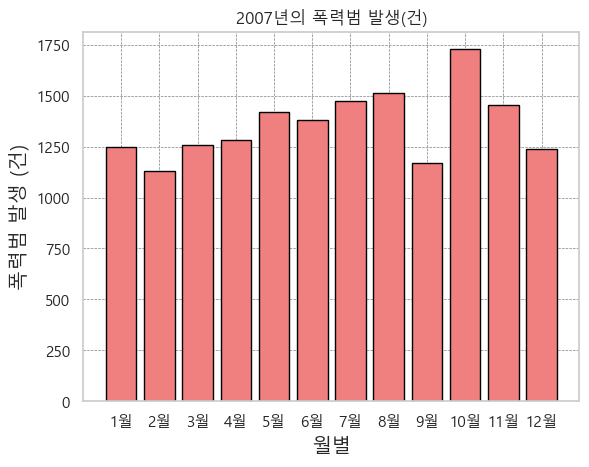

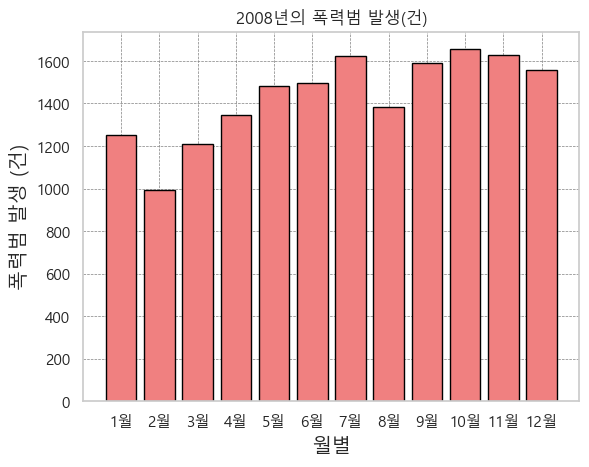

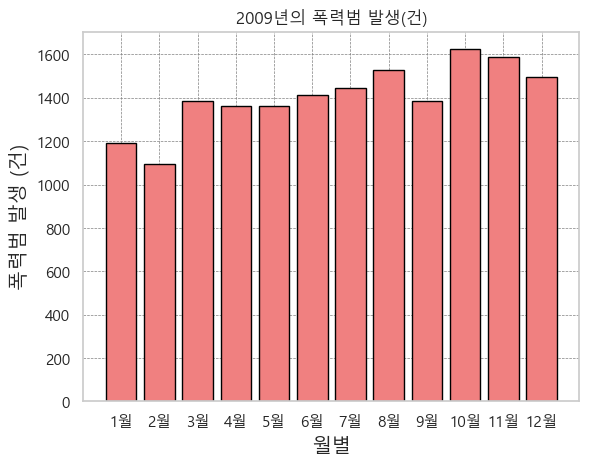

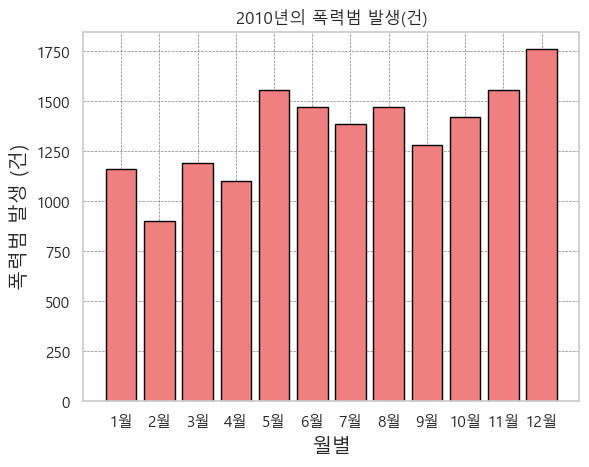

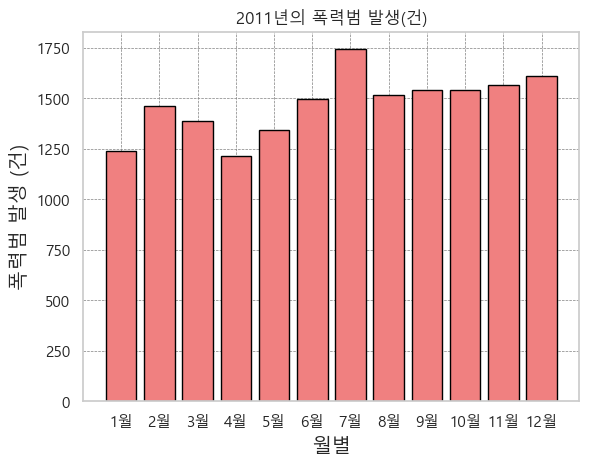

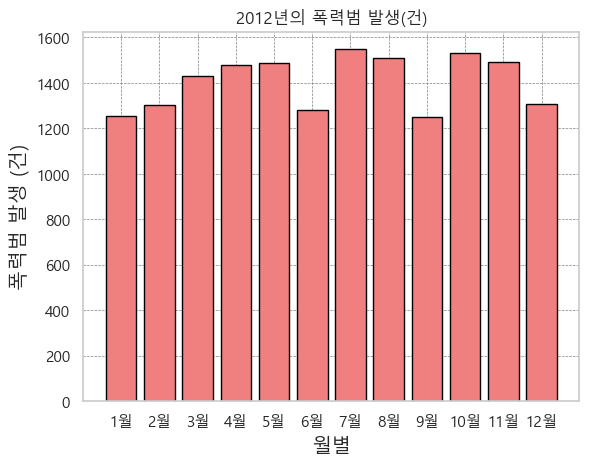

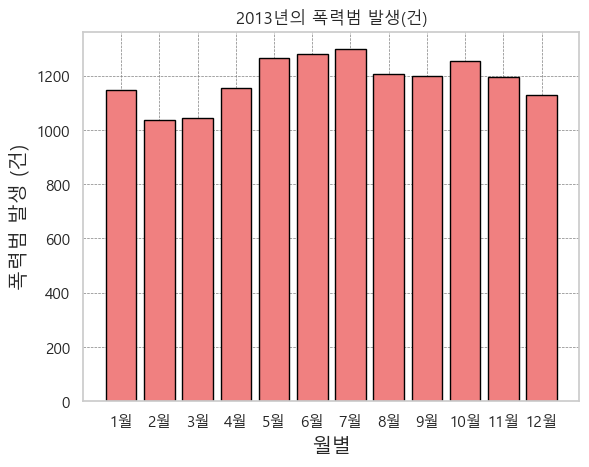

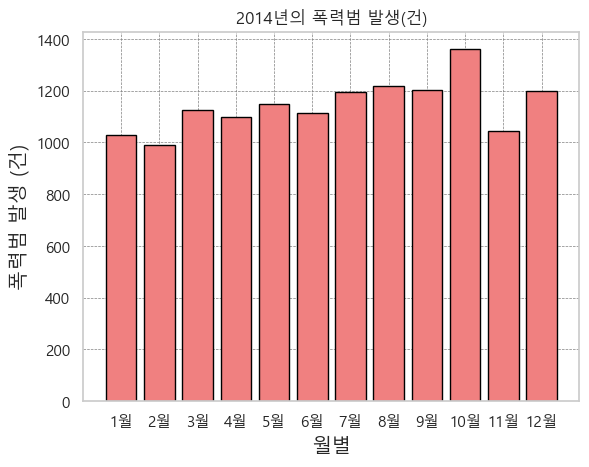

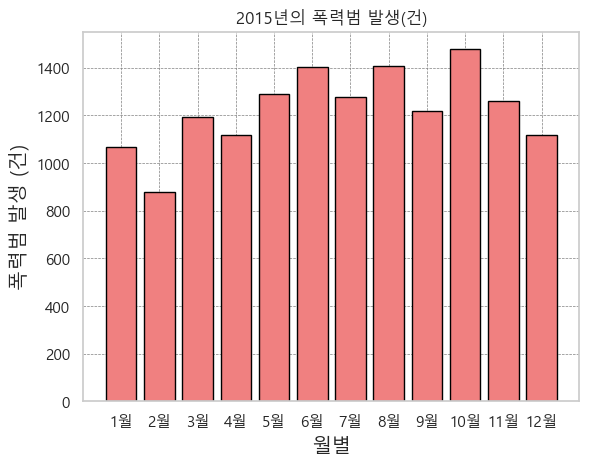

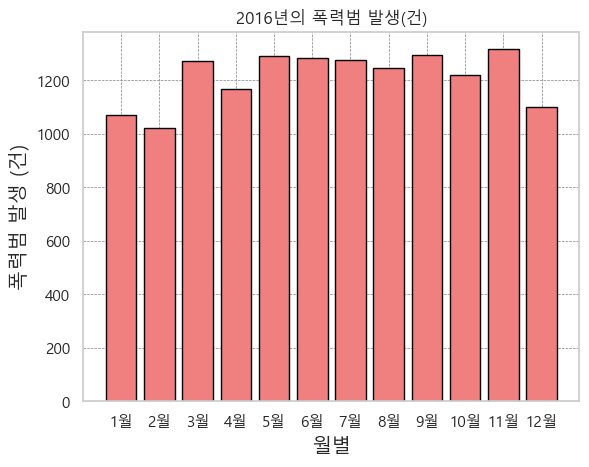

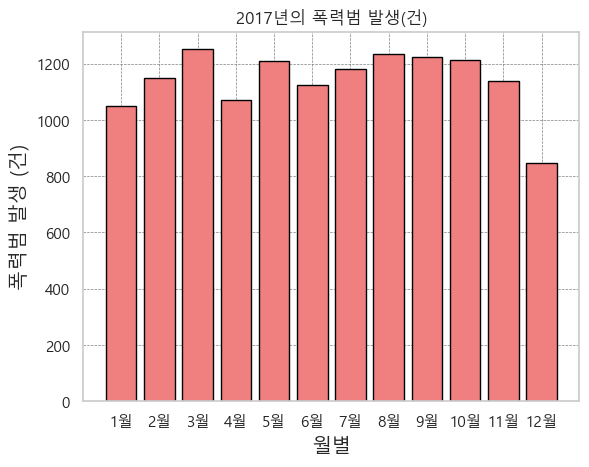

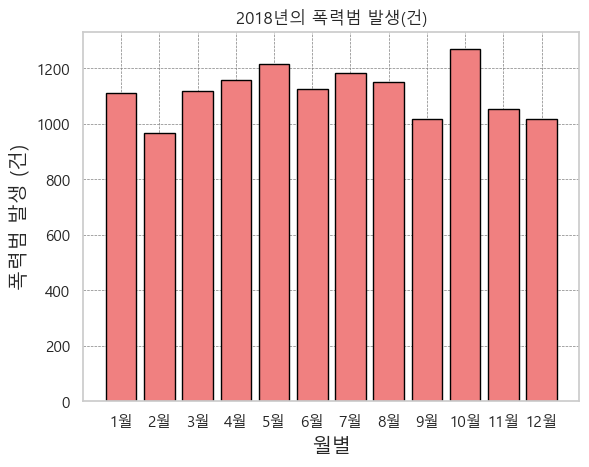

In [712]:
# [3-1] 대구시 연도별 폭력범 발생 건수 시각화

crime_group5=crime_group4.drop(columns=['total'])

for i in range(len(crime_group5)):
    
    # 데이터 설정
    xdata=crime_group5.columns.astype(str)
    ydata=crime_group5.iloc[i]
    
    # 시각화 - 바 그래프
    plt.bar(xdata,ydata,color='lightcoral',edgecolor='black')
    
    # 제목 및 라벨 설정
    plt.title(f'{crime_group5.index[i]}년의 폭력범 발생(건)')
    plt.ylabel('폭력범 발생 (건)',fontdict={'size':'large'})
    plt.xlabel('월별',fontdict={'size':'large'})
    
    # 격자 설정
    plt.grid(which='both',linestyle='--',linewidth=0.5,color='grey')
    
    plt.show()


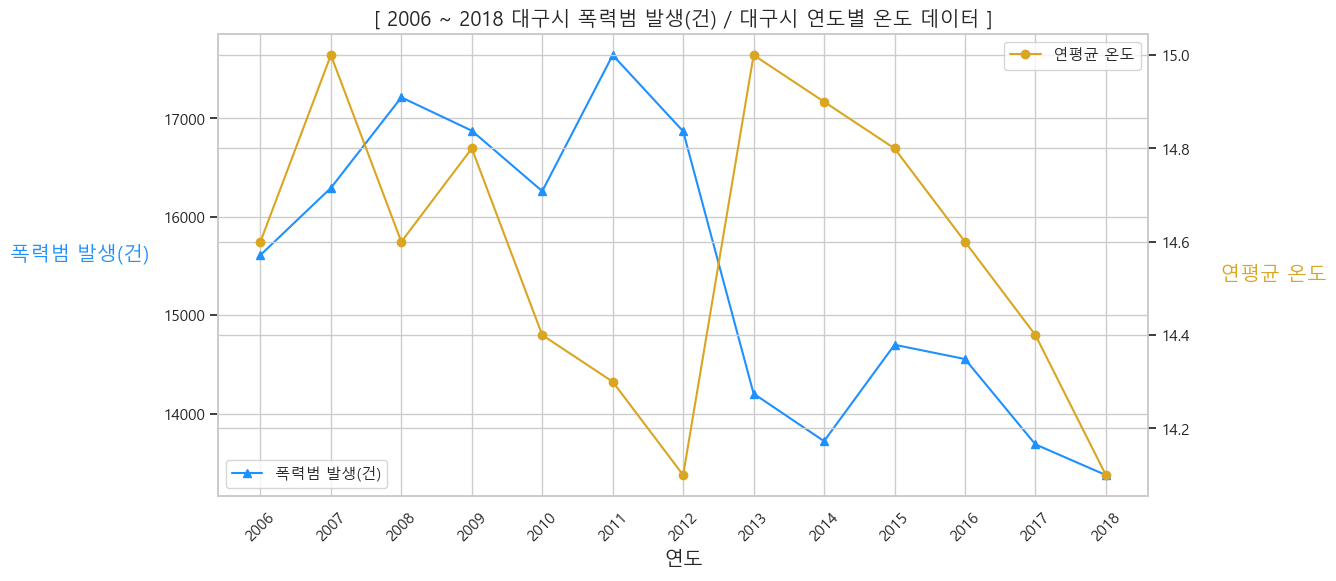

상관계수 : -0.12


In [713]:
# [3-2] 기온과 폭력 범죄의 상관관계 분석 - 연도별 평균온도
# 가설 : 기온이 높을수록 폭력 범죄가 많이 일어날 것이다.
#        연도별 평균 온도를 기준으로 분석하므로 겨울의 온도와 여름의 온도가 모두 평균으로 들어가기에, 상관관계가 낮게 도출될 것이다.
# 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 연도별 평균 온도 데이터 비교

crime_sr=crime_group4['total'].drop(index=['2000','2001','2002','2003','2004','2005'])


# 시각화 - 선그래프 

# subplot 사용
fig,ax1=plt.subplots(figsize=(12,6))

# 필요한 데이터들
ydata=crime_sr
xdata=crime_sr.index
ydata2=tempsr

# 첫 번째 y축 데이터
ax1.plot(xdata,ydata,'^-',color='#1E90FF',label='폭력범 발생(건)')
ax1.set_xlabel('연도', fontdict={'size':'large'})
ax1.set_ylabel('폭력범 발생(건)',color='#1E90FF',rotation=0,labelpad=60, fontdict={'size':'large'})
ax1.tick_params(axis='x',rotation=45)
ax1.legend(loc='lower left')

# 두 번째 y축 데이터
ax2=ax1.twinx()
plt.plot(xdata,ydata2,'o-',color='#DAA520',label='연평균 온도')
ax2.set_ylabel('연평균 온도', color='#DAA520',rotation=0,labelpad=60, fontdict={'size':'large'})
ax2.legend(loc='upper right')

plt.title('[ 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 연도별 온도 데이터 ]',fontdict={'size':'large'})
plt.show()

# 상관계수 

# 비교할 두 시리즈의 인덱스 맞추기
crime_sr.index=pd.Index(range(2006,2006+len(crime_sr)),name='year')

# 비교할 두 시리즈를 DataFrame화 시켜서 상관계수 출력
alldf=pd.DataFrame({'vio':crime_sr,'tem':tempsr})
corr1=alldf.corr().loc['vio','tem']
print(f'상관계수 : {corr1:.2f}')

# 예측했듯이 상관계수가 아주 낮게 나옴
# 월별로 분석이 필요하다고 판단함

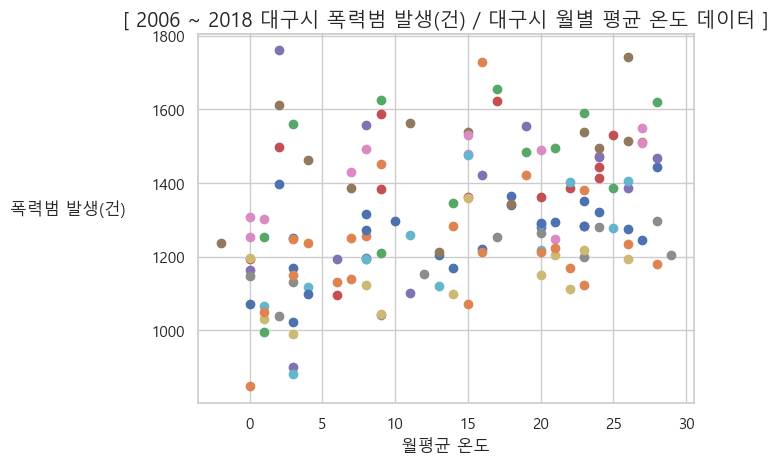

year
2006    0.545890
2007    0.462211
2008    0.550898
2009    0.372664
2010    0.276556
2011    0.420520
2012    0.444100
2013    0.746084
2014    0.468757
2015    0.746725
2016    0.696083
2017    0.571475
2018    0.509683
dtype: float64

상관계수 평균 : 0.52


In [714]:
# [3-3] 기온과 폭력 범죄의 상관관계 분석 - 월별 
# 가설 : 기온이 높을수록 폭력 범죄가 많이 일어날 것이다.
#        연도별 평균 기온이 아닌 월별 평균 기온으로 비교해본다면 온도 변화에 의한 차이를 확인할 수 있을 것이다. 
# 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 평균 온도 데이터 비교

# 인덱스 통일
weather_group2.index=pd.Index(range(2000,2000+len(weather_group2)),name='year')
crime_group5.index=pd.Index(range(2000,2000+len(crime_group5)),name='year')

# 필요한 데이터만 추출
weather_temp=weather_group2.drop(index=[2000,2001,2002,2003,2004,2005,2019,2020,2021,2022])
crime_group5=crime_group5.drop(index=[2000,2001,2002,2003,2004,2005])

weather_temp=weather_temp.T
crime_group5=crime_group5.T

# 시각화 - 산점도그래프

# 반복문으로 산점도 그래프 일괄 시각화
for i in range(len(weather_temp)):
    year=2006+i
    xd=weather_temp[year]
    yd=crime_group5[year]
    plt.scatter(xd,yd)

plt.xlabel('월평균 온도')
plt.ylabel('폭력범 발생(건)',rotation=0,labelpad=60)
plt.title('[ 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 평균 온도 데이터 ]',fontdict={'size':'large'})
plt.show()

# 상관계수
corr2=weather_temp.corrwith(crime_group5)
display(corr2)
print(f'상관계수 평균 : {corr2.mean():.2f}')

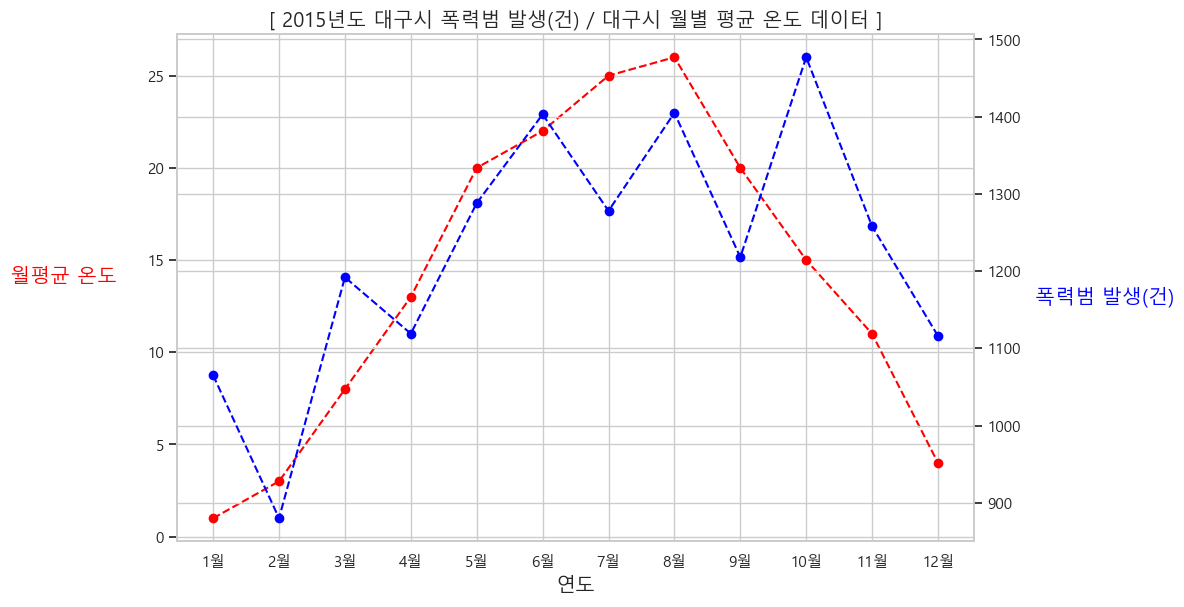

In [715]:
# [3-4] 가장 상관계수가 높았던 2015년도의 데이터 시각화

# 시각화 - 막대그래프
fig, ax1=plt.subplots(figsize=(12,6))

xd1=weather_temp.index
yd1=weather_temp[2015]
yd2=crime_group5[2015]

# 첫 번째 y축 데이터
ax1.plot(xd1,yd1,'o--',color='red')
ax1.set_xlabel('연도',fontdict={'size':'large'})
ax1.set_ylabel('월평균 온도',fontdict={'size':'large','color':'red'},rotation=0,labelpad=60)

# 두 번째 y축 데이터
ax2=ax1.twinx()
ax2.plot(xd1,yd2,'o--',color='blue')
ax2.set_ylabel('폭력범 발생(건)',fontdict={'size':'large','color':'blue'},rotation=0,labelpad=60)


fig.tight_layout()

plt.title('[ 2015년도 대구시 폭력범 발생(건) / 대구시 월별 평균 온도 데이터 ]',fontdict={'size':'large'})
plt.show()

# print(weather_temp.loc[2015])

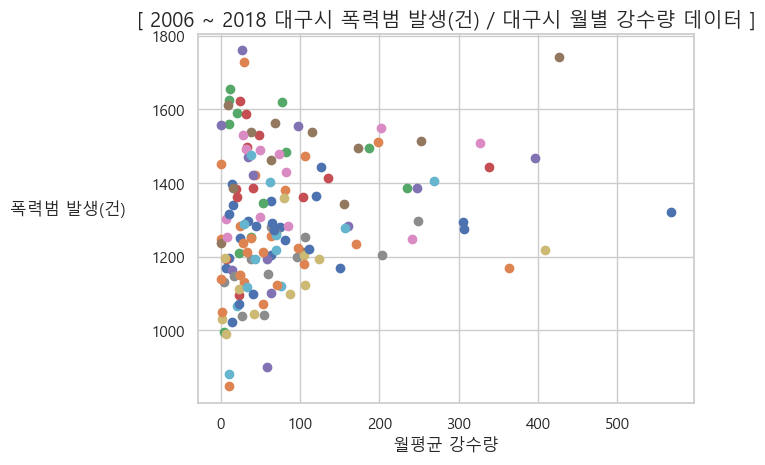

year
2006    0.215972
2007   -0.145936
2008    0.048802
2009    0.119119
2010    0.077712
2011    0.486192
2012    0.187381
2013    0.562335
2014    0.393674
2015    0.459470
2016    0.380664
2017    0.490964
2018    0.542094
dtype: float64

상관계수 평균 : 0.29


year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1월,14,0,38,7,15,1,8,17,2,21,23,2,21
2월,25,30,5,23,58,64,7,27,7,11,15,25,25
3월,11,64,23,19,59,16,82,55,106,44,67,38,98
4월,64,24,54,21,63,104,74,60,88,76,151,53,113
5월,120,44,82,104,97,156,50,70,25,30,65,33,99
6월,64,81,187,136,35,173,85,63,23,62,45,71,121
7월,568,107,77,338,247,427,202,249,124,157,307,105,169
8월,127,198,235,49,396,253,327,203,409,269,81,171,334
9월,75,364,21,41,160,38,241,96,105,70,306,97,109
10월,16,29,12,25,41,115,28,107,80,38,111,54,165


In [716]:
# [3-5] 강수량과 폭력 범죄의 상관관계 분석 - 월별 
# 기온과 폭력 범죄의 상관관계 분석 이후 생긴 호기심에서 출발        
# 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 평균 강수량 데이터 비교

# 인덱스 통일
weather_group4.index=pd.Index(range(2000,2000+len(weather_group4)),name='year')

# 필요한 데이터만 추출
weather_rain=weather_group4.drop(index=[2000,2001,2002,2003,2004,2005,2019,2020,2021,2022])

weather_rain=weather_rain.T

# 시각화 - 산점도그래프

for i in range(len(weather_rain)):
    year=2006+i
    xd=weather_rain[year]
    yd=crime_group5[year]
    plt.scatter(xd,yd)

plt.xlabel('월평균 강수량')
plt.ylabel('폭력범 발생(건)',rotation=0,labelpad=60)
plt.title('[ 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 강수량 데이터 ]',fontdict={'size':'large'})
plt.show()

# 상관계수
corr2=weather_rain.corrwith(crime_group5)
display(corr2)
print(f'상관계수 평균 : {corr2.mean():.2f}')

display(weather_rain)

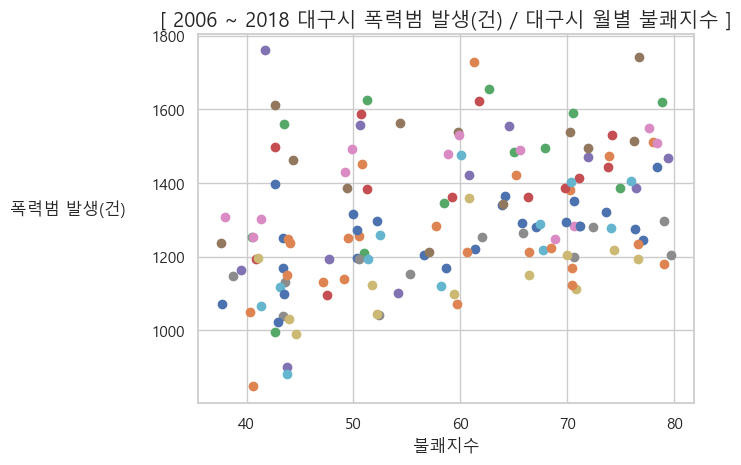

2006    0.555780
2007    0.457497
2008    0.524066
2009    0.353266
2010    0.264458
2011    0.431016
2012    0.432042
2013    0.727059
2014    0.472838
2015    0.729091
2016    0.698936
2017    0.561008
2018    0.479154
dtype: float64

상관계수 평균 : 0.51


In [717]:
# [3-6] 불쾌지수과 폭력 범죄의 상관관계 분석 - 월별 
# 기온과 폭력 범죄의 상관관계 분석 이후 습도까지 포함된 불쾌지수와 폭력 범죄의 상관관계가 궁금해짐        
# 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 불쾌지수 데이터 비교
# 불쾌지수=0.81×기온+0.01×습도×(0.99×기온−14.3)+46.3

# 시각화 - 산점도그래프

for i in range(len(angry)):
    year=2006+i
    xd=angry[year]
    yd=crime_group5[year]
    plt.scatter(xd,yd)

plt.xlabel('불쾌지수')
plt.ylabel('폭력범 발생(건)',rotation=0,labelpad=60)
plt.title('[ 2006 ~ 2018 대구시 폭력범 발생(건) / 대구시 월별 불쾌지수 ]',fontdict={'size':'large'})
plt.show()

# 상관계수
corr2=angry.corrwith(crime_group5)
display(corr2)
print(f'상관계수 평균 : {corr2.mean():.2f}')

[4] 결론 <hr>

In [ ]:
# 결론
'''
(1) 대구시의 월별 평균기온과 월별 폭력범죄 발생 건수 간에 평균적으로 약 0.52의 상관계수가 도출된 것은 두 변수 간에 중간 정도 양의 상관관계가 있음을 시사한다. 
    이것은 기온이 상승할수록 폭력범죄가 증가하는 경향이 있다는 것을 의미하며, 폭염과 같은 고온 환경이 사람들의 스트레스와 공격성을 증가시켜 폭력적인 행동을 
    촉발할 수 있다는 기존의 연구 결과와 어느 정도 일치하다는 것을 보여준다.

(2) 강수량과 폭력범죄 간에 평균적으로 약 0.29의 상관계수가 도출된 것은 비가 폭력범죄 발생에 큰 영향을 미치지 않는다는 것을 나타낸다. 
    이는 강수량이 폭력범죄의 본질적인 발생 요인과는 관련이 없다는 것을 의미한다고 할 수 있다. 또한 비교가 습도가 아닌 강수량을 중심으로 이루어졌고, 
    본 프로젝트에서 장소에 따른 폭력 발생을 고려하지 않았으므로 위와 같은 결과가 도출되었으리라 예상한다.
   
(3) 불쾌지수와 폭력범죄 간에 0.52의 상관계수가 도출된 것은 기온과 마찬가지로 불쾌지수가 높을수록 폭력범죄 발생 가능성이 증가할 수 있다는 것을 의미한다.
    불쾌지수는 기온과 습도를 반영하므로, 불쾌한 환경에서 사람들의 심리적, 신체적 스트레스가 증가해 폭력적인 행동을 유발할 수 있음을 시사한다.

 본 프로젝트에서는 2006년부터 2018년까지의 대구시 데이터를 활용하여 기후와 폭력범죄 간의 상관관계를 확증적 분석 방법으로 도출해냈다.
기온과 불쾌지수 모두 폭력범죄와 중간 정도 양의 상관관계를 가지며, 강수량과 폭력범죄 간에는 거의 상관관계가 없음을 확인할 수 있었다.
이는 기온과 불쾌지수가 높아질수록 폭력범죄 발생 가능성이 증가할 수 있음을 의미하며, 기후가 사회적 문제로 대두될 가능성이 있음을 의미한다.
따라서, 폭력범죄 예방의 일환으로 기후 변화와 같은 환경적 요인을 고려한 종합적인 접근 또한 필요할 것이다. 특히 여름철 폭염 시기를 대비한 
폭력범죄 예방 정책과 대책을 마련하는 것이 유의미할 수 있으며, 기후 변화에 따른 사회적 스트레스 요인들을 완화할 수 있는 다양한 프로그램과 
정책을 도입하는 것이 효과적일 수 있다.
'''